In [2]:
from textblob import TextBlob
import tweepy

In [3]:
path = 'C:/Users/Yidan Wang/Documents/Python Scripts/class-13/'

In [4]:
def getAuthData():
    import csv
    with open(path+'authdata.csv', 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)

    authdata = {}   
    for element in your_list:
        authdata[element[0]] = element[1]

    return authdata

In [5]:
getAuthData()

{'CONSUMER_KEY': 'zsNoC4ZsLnQSdvbYmpjCeibUJ',
 'CONSUMER_SECRET': 'qdBeyxuPHyiWO9gncnbxJZeFhfdaY3DLy20QzYIZ6TY7NypZ8U',
 'OAUTH_TOKEN': '48672914-2WS7xSHmhZEzNpYJNrbPQK7WZR8efH7iJyb8OBMvk',
 'OAUTH_TOKEN_SECRET': 'GcXyzT78FPGoZ0NJ97LR2tA2zUWg6syLCVxrXPZzqKetc'}

In [6]:
authdata = getAuthData()

In [7]:
def getTwitterData(searchTerm, authdata):

    consumer_key = authdata['CONSUMER_KEY']
    consumer_secret = authdata['CONSUMER_SECRET']
    access_token = authdata['OAUTH_TOKEN']
    access_token_secret = authdata['OAUTH_TOKEN_SECRET']
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    
    searchCount = 1800 # The number of tweets you want ... you never get that !
     
    results = api.search(q=searchTerm, count=searchCount)

    print("Search completed ...")
    
    twts = []
    for result in results:
        twts.append(result.text)    

    print("List of tweets assembled ... for ", searchTerm)    
        
    return (twts)
    

In [8]:
# Get and save twitter data
tweetTexts = getTwitterData('@Delta', authdata)
with open(path+'tw_delta.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  
tweetTexts = getTwitterData('@United', authdata)
with open(path+'tw_united.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  
tweetTexts = getTwitterData('@USAirways', authdata)
with open(path+'tw_usair.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  
tweetTexts = getTwitterData('@Southwest', authdata)
with open(path+'tw_southwest.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  
tweetTexts = getTwitterData('@American', authdata)
with open(path+'tw_american.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  
tweetTexts = getTwitterData('@JetBlue', authdata)
with open(path+'tw_jetblue.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item)) 

Search completed ...
List of tweets assembled ... for  @Delta
Search completed ...
List of tweets assembled ... for  @United
Search completed ...
List of tweets assembled ... for  @USAirways
Search completed ...
List of tweets assembled ... for  @Southwest
Search completed ...
List of tweets assembled ... for  @American
Search completed ...
List of tweets assembled ... for  @JetBlue


In [10]:
from textblob import TextBlob

def GetSentimentScores(tweets):
    freqList = []
    for eachTweet in tweets:
        analysis = TextBlob(eachTweet)
        freqList.append(analysis.sentiment[0])
    return freqList

In [9]:
def getAirlineDataAlt():
    airlineDict = {}
    airlineDict = {'JetBlue':82, 
                   'Southwest':80,
                   'American':76,
                   'Delta':76,
                   'United':70
                  }
    return airlineDict

In [11]:
airlineScores = getAirlineDataAlt()
print(airlineScores)

{'JetBlue': 82, 'Southwest': 80, 'American': 76, 'Delta': 76, 'United': 70}


In [12]:
def plotHist(freqList):
    import matplotlib.pyplot as plt
    plt.hist(freqList)

def getTwitterScore(freqList):
    veryNegative = len([x for x in freqList if x<=-0.6])
    veryPositive = len([x for x in freqList if x>= 0.6])
    twitterScore = 0
    if ((veryNegative + veryPositive) != 0):
        twitterScore = 100 * (float (veryPositive) / (veryNegative + veryPositive))
    return round(twitterScore, 2)

In [13]:

def getScore(fileName):
    fn = path+fileName+'.txt'
    with open(fn,'r',encoding="utf-8") as f:
        tweetTexts = f.readlines()
        
    freqList = GetSentimentScores(tweetTexts)
    #print(freqList)
    score = getTwitterScore(freqList)
    return score

In [14]:
scores = {}

scores = {'American': getScore('tw_american'),
          'Delta': getScore('tw_delta'),
          'JetBlue':  getScore('tw_jetblue'),
          'Southwest': getScore('tw_southwest'),
          'United': getScore('tw_united'),
          'USAirways': getScore('tw_usair')
         }

print(scores)

{'American': 66.67, 'Delta': 86.67, 'JetBlue': 97.5, 'Southwest': 29.17, 'United': 82.35, 'USAirways': 0}


In [16]:

import pandas as pd
twdf = pd.DataFrame.from_dict(scores, orient='index')
twdf.columns = ['twitter_Score']
print(twdf)

           twitter_Score
American           66.67
Delta              86.67
JetBlue            97.50
Southwest          29.17
United             82.35
USAirways           0.00


In [17]:
import pandas as pd
airdf = pd.DataFrame.from_dict(airlineScores, orient='index')
airdf.columns = ['airline_Score']
print(airdf)

           airline_Score
JetBlue               82
Southwest             80
American              76
Delta                 76
United                70


In [18]:
result = pd.concat([twdf, airdf], axis=1, join='inner')

In [20]:
print(result)

           twitter_Score  airline_Score
American           66.67             76
Delta              86.67             76
JetBlue            97.50             82
Southwest          29.17             80
United             82.35             70


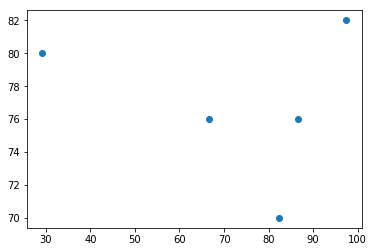

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(result['twitter_Score'], result['airline_Score'])